**Домашнее задание**

Для выполнения домашнего задания необходимо взять boston house-prices datase (sklearn.datasets.load_boston) и сделать тоже самое для задачи регрессии (попробовать разные алгоритмы, поподбирать параметры, вывести итоговое качество).

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
import numpy as np
import sys
import matplotlib as mp

mp.rcParams['pcolor.shading'] = "auto"

/media/ilia/Vol3/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
data = pd.read_csv(load_boston()["filename"], skiprows=1)
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


Настройки по умолчанию, maxdepth = 3.
	Качество модели на тренировочных данных: 0.8251584424966962.
	Качество модели на тестовых данных: 0.7728151817263732.


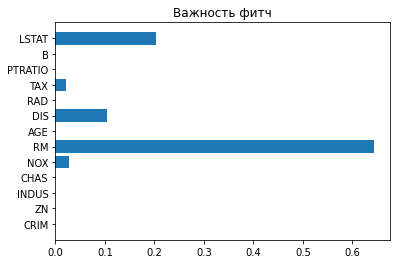

In [3]:
def get_score(X_train, Y_train, X_test, Y_test, criterion="mse", max_depth=3, splitter="best", max_features=None):
    model = DecisionTreeRegressor(criterion=criterion, max_depth=max_depth, splitter=splitter,
        max_features=max_features, random_state=25)
    model.fit(X_train, Y_train)
    model.predict(X_test)
    return model.score(X_train, Y_train), model.score(X_test, Y_test), model

def show_result(score1, score2, model):
    print(f"\tКачество модели на тренировочных данных: {score1}.")
    print(f"\tКачество модели на тестовых данных: {score2}.")
    plt.barh(np.arange(len(model.feature_importances_)), model.feature_importances_)
    plt.yticks(np.arange(len(X_src.columns)), X_src.columns)
    plt.title("Важность фитч")
    plt.show()
    
X_src = data[["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"]]
Y_src = data["MEDV"]
X_train, X_test, Y_train, Y_test = train_test_split(X_src, Y_src, test_size=0.3, random_state=42)

score1, score2, model = get_score(X_train, Y_train, X_test, Y_test)
print("Настройки по умолчанию, maxdepth = 3.")
show_result(score1, score2, model)

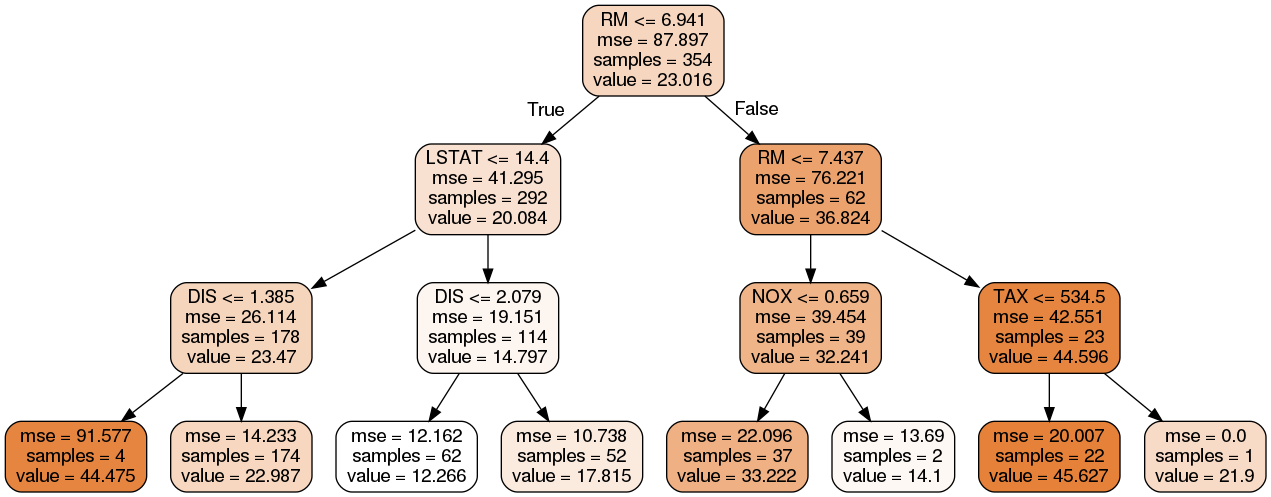

In [4]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data, feature_names=X_train.columns, filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Ручной подбор гиперпараметров.
	Лучшие параметры: criterion = "mse", max_depth = 11, splitter = "best", max_features = 8.
	Качество модели на тренировочных данных: 0.9914360091148403.
	Качество модели на тестовых данных: 0.8861830863476068.


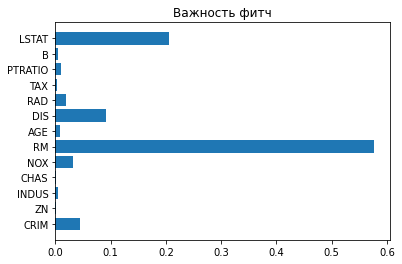

Строить дерево смысла нет, т.к. слишком большая глубина и будет плохая наглядность.


In [5]:
def test_params(X_train, Y_train, X_test, Y_test, lst1, lst2, lst3, lst4):
    max_ = 0
    vars_ = None,None,None,None
    for l1 in lst1:
        for l2 in lst2:
            for l3 in lst3:
                for l4 in lst4:
                    score1, score2, model = get_score(X_train, Y_train, X_test, Y_test,
                        criterion=l1, max_depth=l2, splitter=l3, max_features=l4)
                    if max_ < score2:
                        max_ = score2
                        vars_ = l1,l2,l3,l4,score1,score2,model
    return vars_


params = {"criterion": ["mse", "friedman_mse", "mae"],
    "splitter": ["best", "random"],
    "max_depth": list(range(1, 20)) + [None],
    "max_features": list(range(1, X_src.shape[1])) + ["auto", "sqrt", "log2"]
}

criterion,max_depth,splitter,max_features,score1,score2,model1 = test_params(X_train, Y_train, X_test, Y_test,
    params["criterion"], params["max_depth"], params["splitter"], params["max_features"])
print("Ручной подбор гиперпараметров.")
print(f"\tЛучшие параметры: criterion = \"{criterion}\", max_depth = {max_depth}, splitter = \"{splitter}\", max_features = {max_features}.")
show_result(score1,score2,model1)
print("Строить дерево смысла нет, т.к. слишком большая глубина и будет плохая наглядность.")

Автоматический подбор гиперпараметров с кроссвалидацией.
	Лучшие параметры: criterion = "friedman_mse", max_depth = 13, splitter = "random", max_features = 7.
	Качество модели на тренировочных данных: 0.9973739613908633.
	Качество модели на тестовых данных: 0.6397757130706118.


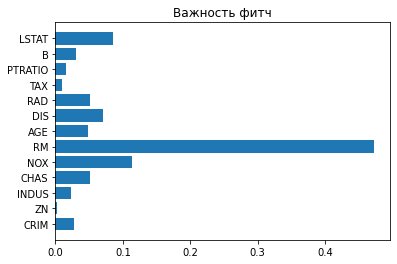

In [6]:
gs = GridSearchCV(DecisionTreeRegressor(), param_grid=params, scoring="r2", return_train_score=False) # scoring='accuracy',
gs.fit(X_train, Y_train)
bp = gs.best_params_
score3, score4, model2 = get_score(X_train, Y_train, X_test, Y_test, criterion=bp["criterion"], max_depth=bp["max_depth"],
    splitter=bp["splitter"], max_features=bp["max_features"])

print("Автоматический подбор гиперпараметров с кроссвалидацией.")
print(f'\tЛучшие параметры: criterion = \"{bp["criterion"]}\", max_depth = {bp["max_depth"]}, splitter = \"{bp["splitter"]}\", max_features = {bp["max_features"]}.')
show_result(score3, score4, model2)

In [7]:
print("\nВ обоих вариантах заметно переобучение на тренировочной выборке.")
print(f"Лучшее значение качества модели на тестовой выборке: {score2}.")


В обоих вариантах заметно переобучение на тренировочной выборке.
Лучшее значение качества модели на тестовой выборке: 0.8861830863476068.
